# Gradient based(GD) vs derivative-free optimization(DFO)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Function to optimize

$$
f(\mathbf{x})=x_{1}^{2}+2 x_{2}^{2}-0.3 \cos \left(3 \pi x_{1}\right)-0.4 \cos \left(4 \pi x_{2}\right)+0.7
$$


in the domain $\mathbf{x} = (x_1, x_2) \in [-100, 100]^{2}$ (i.e., $x_1 \in [-100, 100]$, $x_2 \in [-100, 100]$).

In [2]:
def f(x):
      return x[:,0]**2 + 2*x[:,1]**2 -0.3*np.cos(3.*np.pi*x[:,0])-0.4*np.cos(4.*np.pi*x[:,1])+0.7

In [25]:
def calculate_f(x1: float, x2: float):
  f_x = []
  for i in range(len(x1)):
    for j in range(len(x2)):
      f_x.append(f(np.asarray([[x1[i], x2[j]]])))

  return np.asarray(f_x).reshape(len(x1), len(x2))

In [26]:
# Define coordinates
x1 = np.linspace(-100., 100., 500) # 500 numbers from -100 to 100
x2 = np.linspace(-100., 100., 500)

# Calculate the objective
f_x = calculate_f(x1, x2).reshape(len(x1), len(x2))

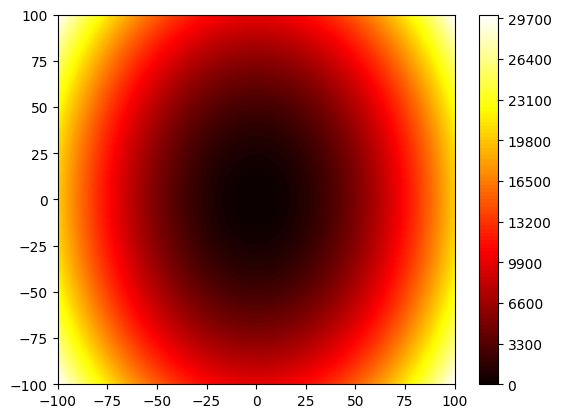

In [27]:
# Plot the objective
plt.contourf(x1, x2, f_x, 100, cmap='hot')
plt.colorbar()

## Gradient Descent

In [16]:
# Implement the gradient for the f(x)
def grad(x: int):
    # Compute the gradient
    grad = np.zeros_like(x) # makes grad equal an array of the same length as x but with values only
                            # equal to 0 so then we can fill them in with the derivatives with
                            # respect to both of the variables
    grad[:,0] = 2*x[:,0] + 0.9*np.pi*np.sin(3*np.pi*x[:,0]) # partial gradient with respect to x1
    grad[:,1] = 4*x[:,1] + 1.6*np.pi*np.sin(4*np.pi*x[:,1]) # partial gradent with respect to x2

    return grad

In [31]:
# Implement  gradient descent (GD)
class GradientDescent(object):
  def __init__(self, grad, step_size: float):
    self.grad = grad
    self.step_size = step_size

  def step(self, x_old):
    grad_x = self.grad(x_old) # compute the gradient at the point we are at the moment

    x_new = x_old - self.step_size * grad_x # we update our position by substracting the gradient times
                                    # the hyperparameter of the step size since we want to go in the
                                    # opposite direction of the gradient
    return x_new

In [34]:
# An auxiliary function for plotting.
def plot_optimization_process(ax, optimizer: float, title: str):
  # Plot the objective function
  ax.contourf(x1, x2, f_x, 100, cmap='hot')

  # Init the solution
  x = np.asarray([[90., -90.]])
  x_opt = x

  # Run the optimization algorithm
  for i in range(num_epochs):
    x = optimizer.step(x)
    x_opt = np.concatenate((x_opt, x), 0)

  ax.plot(x_opt[:,0], x_opt[:,1], linewidth=3.)
  ax.set_title(title)

  0%|          | 0/6 [00:00<?, ?it/s]

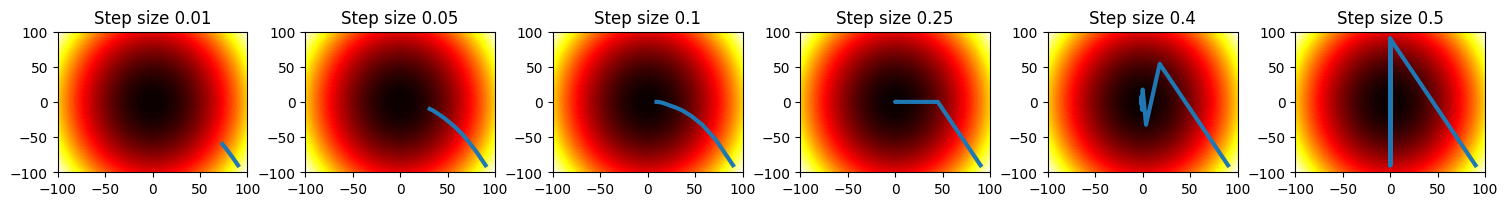

In [35]:
from tqdm.auto import tqdm
# Running the GD algorithm with different step sizes
num_epochs = 10 # the number of epochs
step_sizes = [0.01, 0.05, 0.1, 0.25, 0.4, 0.5] # the step sizes

# plotting the convergence of the GD
fig_gd, axs = plt.subplots(1,len(step_sizes),figsize=(15, 2))
fig_gd.tight_layout()

for i in tqdm(range(len(step_sizes))):
  # init the GD
  gd = GradientDescent(grad, step_size=step_sizes[i])
  # plot the convergence
  plot_optimization_process(axs[i], optimizer=gd, title='Step size ' + str(gd.step_size))

## Derivative-free optimization

In [36]:
class DFO(object):
  def __init__(self, obj_fun, step_size: float):
    self.obj_fun = obj_fun
    self.step_size = step_size
    self.dim = 2 # number of dimensions (two since x1 and x2)
    self.value = None # obj function value after plugging in the two xs
    self.x = None # values of xs

  def step(self, x_old):
    direction = np.random.randn(self.dim) # gives an array(1,2) of random numbers from a standard
                                          # normal distribution which has mean 0 and sd 1

    x_new = x_old + self.step_size * direction # old x value plus the step size times the direction
                                               # which was generated above

    new_value = self.obj_fun(x_new) # new value of the obj fun when we put in the two new xs made above

    if self.value is None or new_value < self.value: # if the new value is smaller meaning closer to 0
                                        # meaning closer to the local minimum, we make that x out new x
        self.value = new_value
        self.x = x_new

    return self.x

In [37]:
def plot_optimization_process_2(ax, optimizer, title: str, x_one: float, x_two: float): # change the plot optimization
                                                        #process in order to allow random starting point
  # Plot the objective function
  ax.contourf(x1, x2, f_x, 100, cmap='hot')

  # Init the solution
  x = np.asarray([[x_one, x_two]])
  x_opt = x

  # Run the optimization algorithm
  for i in range(num_epochs):
    x = optimizer.step(x)
    x_opt = np.concatenate((x_opt, x), 0)

  ax.plot(x_opt[:,0], x_opt[:,1], linewidth=3.)
  ax.set_title(title)

  0%|          | 0/5 [00:00<?, ?it/s]

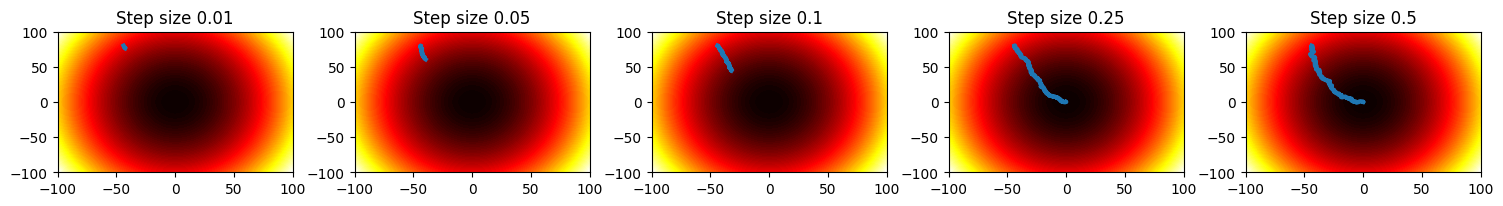

In [40]:
# number of epochs
num_epochs = 1000 # the number of epochs

# step size
step_sizez = [0.01, 0.05, 0.1, 0.25, 0.5]

lst = [] # hyperparameter to give the function a random starting point
for i in range(2):
    lst.append(np.random.randint(-100, high=100))

# plotting the convergence of the DFO
fig_dfo, axs = plt.subplots(1, len(step_sizez), figsize=(15, 2))
fig_dfo.tight_layout()


for i in tqdm(range(len(step_sizez))):
  x_one = min(lst)
  x_two = max(lst)
  step_size = step_sizez[i]
  dfo = DFO(f, step_size = step_size)
  # plot the convergence
  plot_optimization_process_2(axs[i], x_one = x_one, x_two = x_two, optimizer=dfo,
                              title='Step size ' + str(dfo.step_size))